Lab 4 | Customer Analysis Round 2

In [1]:
import pandas as pd  
import numpy as np

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.tail()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [4]:
# Show the dataframe shape

In [5]:
data_shape = data.shape
print(data_shape)

(9134, 24)


In [6]:
# Standardize header names

In [7]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())
data.columns = cols

data.columns

#cols = []
#for colname in data.columns:
#    cols.append(colname.lower())
#
#data.columns = cols

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [9]:
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
data = data.rename(columns={"employmentstatus": "employment status"})

In [11]:
# Which columns are numerical?
# Which columns are categorical?

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employment status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   i

In [13]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employment status', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size'],
      dtype='object')

In [14]:
numerical_columns = data.select_dtypes(include=['float64']).columns
numerical_columns

Index(['customer lifetime value', 'total claim amount'], dtype='object')

In [15]:
# Check and deal with NaN values.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employment status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   i

In [17]:
# We can see that columns: ['state', 'response', 'months since last claim', 'number of open complaints',
# 'vehicle class', 'vehicle size', 'vehicle type'] are having less values that there are rows in the Dataset,
# so there are NaN values there.

In [18]:
data.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [19]:
data = data.drop_duplicates()

In [20]:
# data_cleaned[data_cleaned['state'].isna()].head()

In [21]:
#nan_rows = data.isna().any(axis = 1)
#nan_rows

In [22]:
#data_cleaned = data.loc[~nan_rows]
#data_cleaned.isna().sum()

In [23]:
# Let's explore what do we have in each of these columns

In [24]:
data['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

<AxesSubplot:>

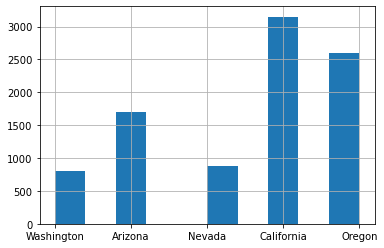

In [25]:
data['state'].hist()

In [26]:
data_cleaned = data[data['state'].isna()==False]
data_cleaned.shape

(9134, 24)

In [27]:
data['response'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:>

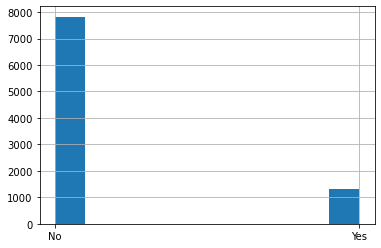

In [28]:
data['response'].hist()

In [29]:
data_cleaned = data_cleaned[data_cleaned['response'].isna()==False]
data_cleaned.shape

(9134, 24)

In [30]:
data_cleaned.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [31]:
data_cleaned['months since last claim'].unique()

array([32, 13, 18, 12, 14,  0, 17, 23, 27,  9, 21, 11, 31,  8,  4, 30, 22,
       15, 33,  1, 19, 28, 10,  7,  3,  5, 20, 24, 29, 34,  6, 35,  2, 16,
       26, 25])

<AxesSubplot:>

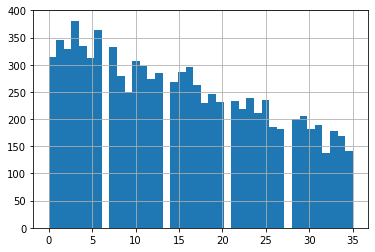

In [32]:
data_cleaned['months since last claim'].hist(bins = 40)

In [33]:
mean_months_since_last_claim = data_cleaned['months since last claim'].mean()

data_cleaned['months since last claim'] = data_cleaned['months since last claim'].fillna(mean_months_since_last_claim)

In [34]:
data_cleaned.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [35]:
data_cleaned['number of open complaints'].unique()

array([0, 2, 1, 3, 5, 4])

<AxesSubplot:>

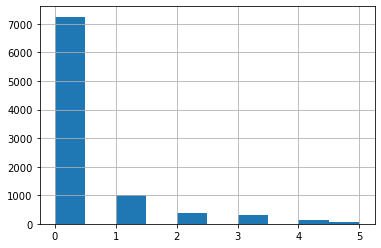

In [36]:
data_cleaned['number of open complaints'].hist()

In [37]:
median_number_of_open_complaints = data_cleaned['number of open complaints'].median()

data_cleaned['number of open complaints'] = data_cleaned['number of open complaints'].fillna(median_number_of_open_complaints)

In [38]:
data_cleaned.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [39]:
data_cleaned['vehicle class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

<AxesSubplot:>

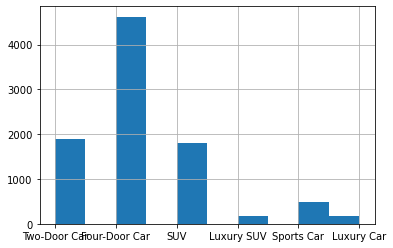

In [40]:
data_cleaned['vehicle class'].hist()

In [41]:
data_cleaned['vehicle class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle class, dtype: int64

In [42]:
most_popular_vehicle_class = 'Four-Door Car'

data_cleaned['vehicle class'] = data_cleaned['vehicle class'].fillna(most_popular_vehicle_class)


In [43]:
data_cleaned.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [44]:
data_cleaned['vehicle size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

<AxesSubplot:>

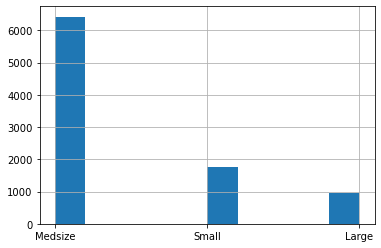

In [45]:
data_cleaned['vehicle size'].hist()

In [46]:
data_cleaned['vehicle size'] = data_cleaned['vehicle size'].fillna('Medsize')

In [47]:
# Datetime format - Extract the months from the dataset and store in a separate column.
# Then filter the data to show only the information for the first quarter ,
# ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [48]:
data_cleaned['effective to date'].unique()

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

In [49]:
data_cleaned['effective to date'].dtype

dtype('O')

In [50]:
data_cleaned['effective to date'] = pd.to_datetime(data_cleaned['effective to date'])
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer lifetime value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective to date              9134 non-null   datetime64[ns]
 7   employment status              9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location code                  9134 non-null   object        
 11  marital status   

In [51]:
data_cleaned['month'] = pd.DatetimeIndex(data_cleaned['effective to date']).month
data_cleaned.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [52]:
data_cleaned['month'].unique()

array([2, 1])

In [53]:
# So this column contains only January and February

In [54]:
# BONUS: Put all the previously mentioned data transformations into a function.

# Not sure I'm ready to do it :) 

Lab 5 | Customer Analysis Round 3

EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.

In [55]:
# Describe DataFrame

data_cleaned.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [56]:
# Show a plot of the total number of responses

data_cleaned['response'].unique

<bound method Series.unique of 0        No
1        No
2        No
3        No
4        No
       ... 
9129     No
9130    Yes
9131     No
9132     No
9133     No
Name: response, Length: 9134, dtype: object>

In [57]:
data_cleaned[data_cleaned['response'] =='Yes'].shape[0]


1308

In [58]:
import matplotlib.pyplot as plt


<AxesSubplot:>

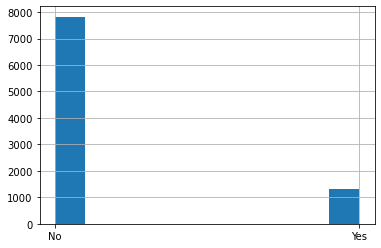

In [59]:
data_cleaned['response'].hist()

In [60]:
# Show a plot of the response rate by the sales channel

data_cleaned.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [61]:
data_cleaned['sales channel'].unique()

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [62]:
data_cleaned[(data_cleaned['response'] == 'Yes') & (data_cleaned['sales channel'] == 'Agent')]

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,...,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize,2
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,...,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize,1
22,YH23384,Arizona,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,...,0,2,Personal Auto,Personal L3,Offer1,Agent,511.200000,Four-Door Car,Medsize,1
41,MB98372,Oregon,2771.045031,Yes,Basic,College,2011-01-11,Employed,F,50071,...,0,1,Corporate Auto,Corporate L3,Offer2,Agent,18.918935,Two-Door Car,Medsize,1
42,IL19217,California,3939.006370,Yes,Extended,Bachelor,2011-01-28,Employed,F,60021,...,0,1,Personal Auto,Personal L2,Offer2,Agent,882.871945,Four-Door Car,Small,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9029,IP93821,California,3600.934326,Yes,Basic,High School or Below,2011-02-25,Retired,F,25147,...,0,1,Personal Auto,Personal L1,Offer1,Agent,694.598288,SUV,Medsize,2
9101,CX22458,California,9075.768214,Yes,Basic,Master,2011-01-26,Employed,M,37722,...,0,8,Personal Auto,Personal L3,Offer1,Agent,158.077504,Sports Car,Medsize,1
9102,TL44525,California,2619.337376,Yes,Basic,Bachelor,2011-02-05,Employed,M,78618,...,0,1,Corporate Auto,Corporate L1,Offer1,Agent,225.578841,Two-Door Car,Medsize,2
9110,RA89822,California,34611.378960,Yes,Basic,High School or Below,2011-01-14,Employed,F,20090,...,0,2,Personal Auto,Personal L2,Offer2,Agent,523.200000,Sports Car,Medsize,1


In [63]:
number_responses_agent_chanel = data_cleaned[(data_cleaned['response'] == 'Yes') & (data_cleaned['sales channel'] == 'Agent')].shape[0]
number_responses_agent_chanel

666

In [64]:
agent_chanel = data_cleaned[data_cleaned['sales channel'] == 'Agent'].shape[0]
agent_chanel

3477

In [65]:
response_rate_agent_chanel = (number_responses_agent_chanel / agent_chanel)*100
response_rate_agent_chanel

19.15444348576359

In [66]:
number_responses_call_center = data_cleaned[(data_cleaned['response'] == 'Yes') & (data_cleaned['sales channel'] == 'Call Center')].shape[0]
number_responses_call_center

192

In [67]:
call_center = data_cleaned[data_cleaned['sales channel'] == 'Call Center'].shape[0]
call_center

1765

In [68]:
response_rate_call_center = (number_responses_call_center / call_center)*100
response_rate_call_center

10.878186968838527

In [69]:
number_responses_web = data_cleaned[(data_cleaned['response'] == 'Yes') & (data_cleaned['sales channel'] == 'Web')].shape[0]
number_responses_web

156

In [70]:
web = data_cleaned[data_cleaned['sales channel'] == 'Web'].shape[0]
web

1325

In [71]:
response_rate_web = (number_responses_web / web)*100
response_rate_web

11.773584905660377

In [72]:
number_responses_branch = data_cleaned[(data_cleaned['response'] == 'Yes') & (data_cleaned['sales channel'] == 'Branch')].shape[0]
number_responses_branch

294

In [73]:
sales_channels = []
for label in data_cleaned['sales channel'].unique():
   sales_channels.append((data_cleaned[data_cleaned['sales channel'] == label]['response'] == 'Yes').mean() * 100)
print(sales_channels)

[19.15444348576359, 10.878186968838527, 11.773584905660377, 11.453058044409817]


In [74]:
branch = data_cleaned[data_cleaned['sales channel'] == 'Branch'].shape[0]
branch

2567

In [75]:
response_rate_branch = (number_responses_branch / branch)*100
response_rate_branch

11.453058044409817

In [76]:
responses = [response_rate_agent_chanel, response_rate_call_center, response_rate_web, response_rate_branch]
responses

[19.15444348576359, 10.878186968838527, 11.773584905660377, 11.453058044409817]

In [77]:
list(data_cleaned['sales channel'].unique())

['Agent', 'Call Center', 'Web', 'Branch']

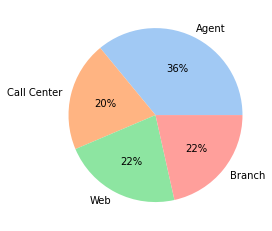

In [78]:
import seaborn as sns

#define data
data = responses
labels = list(data_cleaned['sales channel'].unique())

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

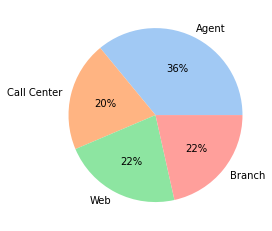

In [79]:
# We can also use sales_channels to do the same

import seaborn as sns

#define data
data = sales_channels
labels = list(data_cleaned['sales channel'].unique())

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()




In [80]:
# Or we can use groupby

In [81]:
data_cleaned['response']

0        No
1        No
2        No
3        No
4        No
       ... 
9129     No
9130    Yes
9131     No
9132     No
9133     No
Name: response, Length: 9134, dtype: object

In [82]:
data_cleaned['response_bool'] = data_cleaned['response'] == 'Yes'
data_grouped = data_cleaned.groupby('sales channel')['response_bool'].mean()

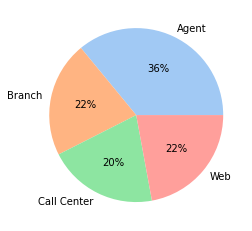

In [83]:
# We can also use sales_channels to do the same

import seaborn as sns

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data_grouped, labels = data_grouped.index, colors = colors, autopct='%.0f%%')
plt.show()


In [84]:
type(data_grouped)

pandas.core.series.Series

In [85]:
# Show a plot of the response rate by the total claim amount

In [86]:
data_grouped[0]

0.1915444348576359

In [87]:
data_cleaned['total claim amount'].unique()

array([ 384.811147, 1131.464935,  566.472247, ...,  541.282007,
        198.234764,  790.784983])

In [90]:
data_grouped_total_claim_amount = data_cleaned.groupby('total claim amount')['response_bool'].mean()
data_grouped_total_claim_amount

total claim amount
0.099007       0.0
0.382107       0.0
0.423310       0.0
0.517753       0.0
0.769185       0.0
              ... 
2345.413441    0.0
2452.894264    0.0
2552.343856    0.0
2759.794354    0.0
2893.239678    0.0
Name: response_bool, Length: 5106, dtype: float64

response
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total claim amount, dtype: object

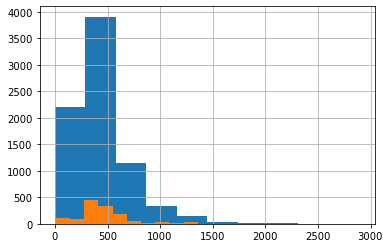

In [96]:
data_cleaned.groupby('response')['total claim amount'].hist()

<AxesSubplot:xlabel='total claim amount', ylabel='Count'>

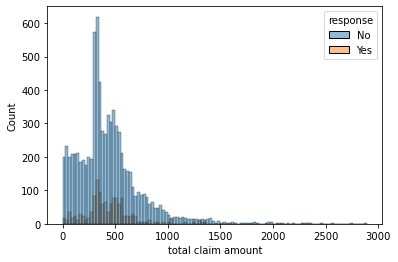

In [98]:
sns.histplot(data=data_cleaned, x='total claim amount', hue='response')

In [88]:
# Show a plot of the response rate by income

response
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: income, dtype: object

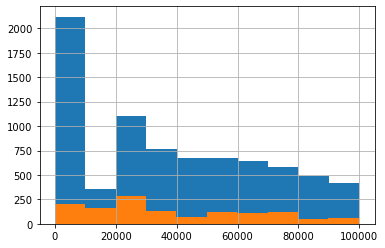

In [97]:
data_cleaned.groupby('response')['income'].hist()

<AxesSubplot:xlabel='income', ylabel='Count'>

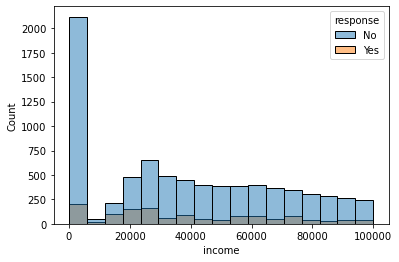

In [99]:
sns.histplot(data=data_cleaned, x='income', hue='response')